In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from keras.callbacks import EarlyStopping

In [4]:
df0718 = pd.read_csv('/content/gdrive/MyDrive/dataset/0718.csv')
df0721 = pd.read_csv('/content/gdrive/MyDrive/dataset/0721.csv')
df0722 = pd.read_csv('/content/gdrive/MyDrive/dataset/0722.csv')
df0723 = pd.read_csv('/content/gdrive/MyDrive/dataset/0723.csv')
df0724 = pd.read_csv('/content/gdrive/MyDrive/dataset/0724.csv')
df0728 = pd.read_csv('/content/gdrive/MyDrive/dataset/0728.csv')
df0729 = pd.read_csv('/content/gdrive/MyDrive/dataset/0729.csv')
df0730 = pd.read_csv('/content/gdrive/MyDrive/dataset/0730.csv')

# 考虑将跨日数据合并
df = pd.concat([df0718, df0721, df0722, df0723, df0724, df0728, df0729, df0730], ignore_index=True)
df['Vwap_ETFPrice'] = (df['ETFBidPrice1']*df['ETFBidVol1'] + df['ETFAskPrice1']*df['ETFAskVol1'])/(df['ETFBidVol1'] + df['ETFAskVol1'])
df

,index,bidforward,askforward,midforward,K,Vwap,BidPrice1,BidPrice2,AskPrice1,AskPrice2,...,AskVol2,iopv,ETFBidPrice1,ETFAskPrice1,ETFBidVol1,ETFAskVol1,ETFVolume,ETFLastPrice,ETFTotalValueTraded,Vwap_ETFPrice
0,35:01.1,2.2597,2.2594,2.25955,2.25,6105.500000,6105.4,6103.0,6105.6,6105.8,...,1.0,2.26748,2.263,2.264,794500.0,1443600.0,1.145978e+08,2.263,2.590122e+08,2.263645
1,35:01.6,2.2595,2.2592,2.25935,2.25,6105.400000,6103.0,6102.6,6105.2,6105.4,...,2.0,2.26766,2.263,2.264,786400.0,1377800.0,1.147018e+08,2.264,2.592476e+08,2.263637
2,35:02.1,2.2599,2.2596,2.25975,2.25,6105.466667,6104.2,6104.0,6105.4,6106.2,...,2.0,2.26754,2.263,2.264,786400.0,377800.0,1.157018e+08,2.264,2.615116e+08,2.263325
3,35:02.6,2.2603,2.2599,2.26010,2.25,6105.500000,6105.8,6105.4,6106.2,6106.4,...,4.0,2.26757,2.263,2.264,587800.0,387700.0,1.159029e+08,2.264,2.619667e+08,2.263397
4,35:03.1,2.2606,2.2604,2.26050,2.25,6106.200000,6106.0,6105.8,6106.4,6106.8,...,2.0,2.26785,2.263,2.264,2174400.0,254200.0,1.159069e+08,2.264,2.619758e+08,2.263105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220744,1900-01-01 14:56:58.104885,2.3445,2.3441,2.34430,2.35,6279.800000,6279.8,6279.6,6280.2,6280.8,...,4.0,2.33959,2.345,2.346,3889100.0,2438800.0,1.781350e+09,2.346,4.193257e+09,2.345385
220745,1900-01-01 14:56:58.604649,2.3445,2.3441,2.34430,2.35,6279.800000,6279.8,6279.6,6280.0,6280.2,...,2.0,2.33956,2.345,2.346,3797800.0,2384800.0,1.781501e+09,2.345,4.193610e+09,2.345386
220746,1900-01-01 14:56:59.104586,2.3445,2.3440,2.34425,2.35,6279.800000,6279.8,6279.6,6280.0,6280.2,...,2.0,2.33957,2.345,2.346,3797800.0,1708400.0,1.781507e+09,2.346,4.193623e+09,2.345310
220747,1900-01-01 14:56:59.604697,2.3444,2.3441,2.34425,2.30,6279.800000,6279.8,6279.6,6280.0,6280.2,...,2.0,2.33958,2.345,2.346,3772500.0,1678100.0,1.781547e+09,2.345,4.193718e+09,2.345308


In [5]:
features = df[[
    'bidforward', 'askforward', 'midforward', 'K',
    'Vwap', 'BidPrice1', 'BidPrice2', 'AskPrice1' ,'AskPrice2',
    'BidVol1', 'BidVol2', 'AskVol1', 'AskVol2', 'iopv',
    'ETFBidPrice1', 'ETFAskPrice1', 'ETFBidVol1', 'ETFAskVol1',
    'ETFVolume', 'ETFLastPrice', 'ETFTotalValueTraded'
]].values

# 标准化 我们舍弃这一标准化定义
# scaler = StandardScaler()
# features = scaler.fit_transform(features)

target = df['Vwap_ETFPrice']

In [11]:
def build_simple_deeplob(input_shape, num_classes=3, dropout_rate=0.3):
    inp = layers.Input(shape=input_shape)  # input_shape = (window_length, 21)

    x = layers.Conv1D(64, 3, padding='same')(inp)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Dropout(dropout_rate)(x)

    x = layers.Conv1D(64, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Dropout(dropout_rate)(x)

    x = layers.LSTM(64, return_sequences=False)(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(dropout_rate)(x)

    out = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=inp, outputs=out)
    return model

window_length = 100  # 你实际用的滑动窗口长度
input_shape = (window_length, 21)  # 4个特征：买一价、买一量、卖一价、卖一量
model = build_simple_deeplob(input_shape)
from tensorflow.keras.optimizers import AdamW
optimizer = AdamW(learning_rate=1e-3, weight_decay=1e-5)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 21)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 100, 64)        │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 100, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 100, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 100, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 100, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,339 (212.26 KB)

 Trainable params: 54,083 (211.26 KB)

 Non-trainable params: 256 (1.00 KB)

Okay now, we want to make a serious definition about how we should treat up/down situation, or simply, how we choose Κ and α.

In [ ]:
for k in [10, 20, 50, 100]:

  print(f'======= k={k} =======')

  returns = []
  for i in range(len(target) - k):
    now = target[i]
    future = np.mean(target[i+1: i+1+k])
    returns.append(np.log(future/now))
  returns = np.array(returns)
  vol = np.std(returns)

  print(f"Future {k} steps avg log return volatility: {vol:.6f}")

  up_threshold_80 = np.quantile(returns, 0.80)
  down_threshold_20 = np.quantile(returns, 0.20)

  print(f"Up threshold (80% quantile): {up_threshold_80:.6f}")
  print(f"Down threshold (20% quantile): {down_threshold_20:.6f}")

  up_threshold_90 = np.quantile(returns, 0.90)
  down_threshold_10 = np.quantile(returns, 0.10)

  print(f"Up threshold (90% quantile): {up_threshold_90:.6f}")
  print(f"Down threshold (10% quantile): {down_threshold_10:.6f}")

======= k=10 =======
Future 10 steps avg log return volatility: 0.000214
Up threshold (80% quantile): 0.000050
Down threshold (20% quantile): -0.000050
Up threshold (90% quantile): 0.000166
Down threshold (10% quantile): -0.000158
======= k=20 =======
Future 20 steps avg log return volatility: 0.000258
Up threshold (80% quantile): 0.000104
Down threshold (20% quantile): -0.000101
Up threshold (90% quantile): 0.000287
Down threshold (10% quantile): -0.000273
======= k=50 =======
Future 50 steps avg log return volatility: 0.000339
Up threshold (80% quantile): 0.000218
Down threshold (20% quantile): -0.000205
Up threshold (90% quantile): 0.000424
Down threshold (10% quantile): -0.000403
======= k=100 =======
Future 100 steps avg log return volatility: 0.000433
Up threshold (80% quantile): 0.000321
Down threshold (20% quantile): -0.000298
Up threshold (90% quantile): 0.000524
Down threshold (10% quantile): -0.000498


我们首先考虑三个目标：

1. **让分类任务有意义（避免全是震荡类）**

2. **让上涨/下跌类样本足够多（避免样本不均）**

3. **逻辑一致性（较大的 Κ 要允许更大的波动）**

然而对于第二点，我有疑问。我们目前设置33%和66%的threshold，然而需要考虑到，在现实情况中，不可能有三分之一的时间在下降，三分之一的时间在上涨，如此均衡。换句话来说，在以震荡为主行情的市场力，数据不平衡是天然的问题。

based on the results, we can make a choice:
1. κ=10, α=1bp, (0.5bp?)
2. κ=20, α=1bp, 2bp
3. κ=50, α=2bp, 4bp
4. κ=100, α=3bp, 5bp

In [6]:
def sample_generating(k, alpha, window_length=100):

  X = []
  y = []

  for i in range(len(target) - window_length - k):

    X.append(features[i:i+window_length])
    now = target[i + window_length - 1]
    future = np.mean(target[i + window_length: i + window_length + k])

    if future > now*(1+alpha):
      y.append(2)
    elif future < now*(1-alpha):
      y.append(0)
    else:
      y.append(1)

  X = np.array(X)
  y = np.array(y)

  return X, y

Κ = 10, α = 1bp

In [ ]:
X, y = sample_generating(k=10, alpha=1e-4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_label))

Epoch 1/10
1717/1717 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.7506 - loss: 0.6229 - val_accuracy: 0.7081 - val_loss: 0.6323
Epoch 2/10
1717/1717 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7593 - loss: 0.5526 - val_accuracy: 0.7041 - val_loss: 0.6352
Epoch 3/10
1717/1717 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.7646 - loss: 0.5395 - val_accuracy: 0.6945 - val_loss: 0.6461
Epoch 4/10
1717/1717 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.7725 - loss: 0.5256 - val_accuracy: 0.6746 - val_loss: 0.6661
Epoch 5/10
1717/1717 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.7774 - loss: 0.5153 - val_accuracy: 0.6630 - val_loss: 0.6773
Epoch 6/10
1717/1717 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7809 - loss: 0.5057 - val_accuracy: 0.6925 - val_loss: 0.6550
Epoch 7/10
1717/1717 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.7884 - loss: 0.4913 - val_accuracy: 0.6797 - val_loss: 0.6802
Epoch 8/10
1717/1717 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.7940 - loss: 0

# A benchmark model: **Κ = 20, α = 1bp, 2bp**

In [ ]:
X, y = sample_generating(k=20, alpha=1e-4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_label))

Epoch 1/10
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.6387 - loss: 0.7442 - val_accuracy: 0.6265 - val_loss: 0.8971
Epoch 2/10
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.6683 - loss: 0.6915 - val_accuracy: 0.6387 - val_loss: 0.8392
Epoch 3/10
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6821 - loss: 0.6684 - val_accuracy: 0.6261 - val_loss: 0.8538
Epoch 4/10
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.6945 - loss: 0.6465 - val_accuracy: 0.6164 - val_loss: 0.9014
Epoch 5/10
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7098 - loss: 0.6208 - val_accuracy: 0.6105 - val_loss: 0.9503
Epoch 6/10
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7256 - loss: 0.5921 - val_accuracy: 0.6072 - val_loss: 0.9231
Epoch 7/10
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7417 - loss: 0.5635 - val_accuracy: 0.6014 - val_loss: 1.0224
Epoch 8/10
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7586 - loss: 0

In [ ]:
X, y = sample_generating(k=20, alpha=2e-4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_label))

Epoch 1/10
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.7695 - loss: 0.5305 - val_accuracy: 0.7508 - val_loss: 0.5720
Epoch 2/10
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7757 - loss: 0.5185 - val_accuracy: 0.7503 - val_loss: 0.5897
Epoch 3/10
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7819 - loss: 0.5043 - val_accuracy: 0.7550 - val_loss: 0.5772
Epoch 4/10
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7862 - loss: 0.4970 - val_accuracy: 0.7448 - val_loss: 0.5951
Epoch 5/10
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7894 - loss: 0.4878 - val_accuracy: 0.7453 - val_loss: 0.6033
Epoch 6/10
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7966 - loss: 0.4744 - val_accuracy: 0.7440 - val_loss: 0.6155
Epoch 7/10
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.8012 - loss: 0.4649 - val_accuracy: 0.7374 - val_loss: 0.6311
Epoch 8/10
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.8052 - loss: 0

Κ = 50, α = 2bp, 4bp

In [ ]:
X, y = sample_generating(k=50, alpha=2e-4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_label))

Epoch 1/10
1716/1716 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8075 - loss: 0.5103 - val_accuracy: 0.5200 - val_loss: 1.2959
Epoch 2/10
1716/1716 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8598 - loss: 0.3501 - val_accuracy: 0.5111 - val_loss: 1.4864
Epoch 3/10
1716/1716 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8803 - loss: 0.2990 - val_accuracy: 0.5204 - val_loss: 1.5854
Epoch 4/10
1716/1716 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.8952 - loss: 0.2664 - val_accuracy: 0.5180 - val_loss: 1.8147
Epoch 5/10
1716/1716 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9103 - loss: 0.2326 - val_accuracy: 0.5420 - val_loss: 1.7284
Epoch 6/10
1716/1716 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9159 - loss: 0.2177 - val_accuracy: 0.5207 - val_loss: 1.8454
Epoch 7/10
1716/1716 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9185 - loss: 0.2093 - val_accuracy: 0.5369 - val_loss: 1.7798
Epoch 8/10
1716/1716 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9272 - loss

In [ ]:
X, y = sample_generating(k=50, alpha=4e-4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_label))

Epoch 1/10
1716/1716 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8904 - loss: 0.2631 - val_accuracy: 0.6347 - val_loss: 1.1251
Epoch 2/10
1716/1716 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9317 - loss: 0.1664 - val_accuracy: 0.6257 - val_loss: 1.3323
Epoch 3/10
1716/1716 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9309 - loss: 0.1757 - val_accuracy: 0.6299 - val_loss: 1.3395
Epoch 4/10
1716/1716 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9490 - loss: 0.1277 - val_accuracy: 0.6519 - val_loss: 1.3479
Epoch 5/10
1716/1716 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9516 - loss: 0.1212 - val_accuracy: 0.6110 - val_loss: 1.4688
Epoch 6/10
1716/1716 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9529 - loss: 0.1204 - val_accuracy: 0.6205 - val_loss: 1.3980
Epoch 7/10
1716/1716 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9533 - loss: 0.1220 - val_accuracy: 0.6201 - val_loss: 1.3887
Epoch 8/10
1716/1716 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9606 - los

Κ = 100, α = 3bp, 5bp

In [ ]:
X, y = sample_generating(k=100, alpha=3e-4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_label))

Epoch 1/10
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8282 - loss: 0.4889 - val_accuracy: 0.4970 - val_loss: 1.8197
Epoch 2/10
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9076 - loss: 0.2406 - val_accuracy: 0.5020 - val_loss: 1.9587
Epoch 3/10
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9282 - loss: 0.1899 - val_accuracy: 0.4972 - val_loss: 2.2345
Epoch 4/10
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9384 - loss: 0.1633 - val_accuracy: 0.4904 - val_loss: 2.5191
Epoch 5/10
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9406 - loss: 0.1596 - val_accuracy: 0.4893 - val_loss: 2.5729
Epoch 6/10
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9511 - loss: 0.1323 - val_accuracy: 0.4768 - val_loss: 2.8860
Epoch 7/10
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9562 - loss: 0.1176 - val_accuracy: 0.4874 - val_loss: 2.6964
Epoch 8/10
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9581 - lo

In [ ]:
X, y = sample_generating(k=100, alpha=5e-4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_label))

Epoch 1/10
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9067 - loss: 0.2470 - val_accuracy: 0.6774 - val_loss: 1.5761
Epoch 2/10
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9462 - loss: 0.1313 - val_accuracy: 0.6781 - val_loss: 1.5974
Epoch 3/10
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9576 - loss: 0.1092 - val_accuracy: 0.6708 - val_loss: 1.6261
Epoch 4/10
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9614 - loss: 0.0997 - val_accuracy: 0.6622 - val_loss: 1.5137
Epoch 5/10
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9593 - loss: 0.1109 - val_accuracy: 0.6648 - val_loss: 1.5115
Epoch 6/10
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9722 - loss: 0.0743 - val_accuracy: 0.6759 - val_loss: 1.4260
Epoch 7/10
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9740 - loss: 0.0685 - val_accuracy: 0.6673 - val_loss: 1.7531
Epoch 8/10
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9720 -

we then choose Κ=20, α=1bp as our benchmark.

# Feature Engineering

In [7]:
def Normalization(df):

  dff = df.copy()

  # relative price
  ## forward
  dff['bidforward_rel'] = (dff['bidforward'] - dff['midforward'])/dff['midforward']
  dff['askforward_rel'] = (dff['askforward'] - dff['midforward'])/dff['midforward']
  ## IC
  dff['mid_IC'] = (dff['BidPrice1'] + dff['AskPrice1'])/2
  dff['BidPrice1_rel'] = (dff['BidPrice1'] - dff['mid_IC']) / dff['mid_IC']
  dff['BidPrice2_rel'] = (dff['BidPrice2'] - dff['mid_IC']) / dff['mid_IC']
  dff['AskPrice1_rel'] = (dff['AskPrice1'] - dff['mid_IC']) / dff['mid_IC']
  dff['AskPrice2_rel'] = (dff['AskPrice2'] - dff['mid_IC']) / dff['mid_IC']
  dff['Vwap_rel'] = (dff['Vwap'] - dff['mid_IC']) / dff['mid_IC']
  ## ETF
  dff['mid_ETF'] = (dff['ETFBidPrice1'] + dff['ETFAskPrice1'])/2
  dff['ETFBidPrice1_rel'] = (dff['ETFBidPrice1'] - dff['mid_ETF']) / dff['mid_ETF']
  dff['ETFAskPrice1_rel'] = (dff['ETFAskPrice1'] - dff['mid_ETF']) / dff['mid_ETF']
  dff['ETFLastPrice'] = (dff['ETFLastPrice'] - dff['mid_ETF']) / dff['mid_ETF']

  # volume
  for col in [
    'BidVol1', 'BidVol2', 'AskVol1', 'AskVol2',
    'ETFBidVol1', 'ETFAskVol1', 'ETFVolume', 'ETFTotalValueTraded'
    ]:

    dff[col + '_log'] = np.log1p(dff[col])

  feature_cols = [
    'bidforward_rel', 'askforward_rel', 'midforward', 'K', 'Vwap_rel',
    'BidPrice1_rel', 'BidPrice2_rel', 'AskPrice1_rel', 'AskPrice2_rel',
    'BidVol1_log', 'BidVol2_log', 'AskVol1_log', 'AskVol2_log',
    'ETFBidPrice1_rel', 'ETFAskPrice1_rel',
    'ETFBidVol1_log', 'ETFAskVol1_log',
    'ETFVolume_log', 'ETFLastPrice', 'ETFTotalValueTraded_log', 'iopv'
    ]

  features = dff[feature_cols]

  target = dff['Vwap_ETFPrice'].values

  return features, target

In [11]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

features, target = Normalization (df)
X, y = sample_generating(k=20, alpha=1e-4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

# ===== 模型预测与评估 =====
y_pred = model.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_label))

Epoch 1/20
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 35s 11ms/step - accuracy: 0.6361 - loss: 0.7658 - val_accuracy: 0.5869 - val_loss: 0.8280
Epoch 2/20
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - accuracy: 0.6565 - loss: 0.7163 - val_accuracy: 0.4855 - val_loss: 0.9437
Epoch 3/20
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - accuracy: 0.6629 - loss: 0.7029 - val_accuracy: 0.6374 - val_loss: 0.7964
Epoch 4/20
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - accuracy: 0.6706 - loss: 0.6921 - val_accuracy: 0.6401 - val_loss: 0.8041
Epoch 5/20
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - accuracy: 0.6788 - loss: 0.6796 - val_accuracy: 0.6275 - val_loss: 0.9330
Epoch 6/20
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - accuracy: 0.6864 - loss: 0.6663 - val_accuracy: 0.5357 - val_loss: 0.9564
Epoch 7/20
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - accuracy: 0.6961 - loss: 0.6513 - val_accuracy: 0.4278 - val_loss: 1.2435
Epoch 8/20
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - accuracy: 0.7030 -

it shows that feature engineering (mainly normalization) works.

good idea: how to know if it's over-fitting

In [12]:
# ========= 1. 测试集预测与评估 =========
y_pred = model.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=1)

print("=== 测试集评估 ===")
print(classification_report(y_test, y_pred_label))

# ========= 2. 训练集预测与评估（用于判断过拟合） =========
y_pred_train = model.predict(X_train)
y_pred_train_label = np.argmax(y_pred_train, axis=1)

print("=== 训练集评估 ===")
print(classification_report(y_train, y_pred_train_label))

1379/1379 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
=== 测试集评估 ===
              precision    recall  f1-score   support

           0       0.77      0.05      0.10      9130
           1       0.64      0.92      0.75     26073
           2       0.64      0.42      0.51      8923

    accuracy                           0.64     44126
   macro avg       0.68      0.46      0.45     44126
weighted avg       0.66      0.64      0.57     44126

5516/5516 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step
=== 训练集评估 ===
              precision    recall  f1-score   support

           0       0.81      0.07      0.13     35227
           1       0.64      0.92      0.75    105255
           2       0.62      0.36      0.45     36021

    accuracy                           0.64    176503
   macro avg       0.69      0.45      0.45    176503
weighted avg       0.67      0.64      0.57    176503



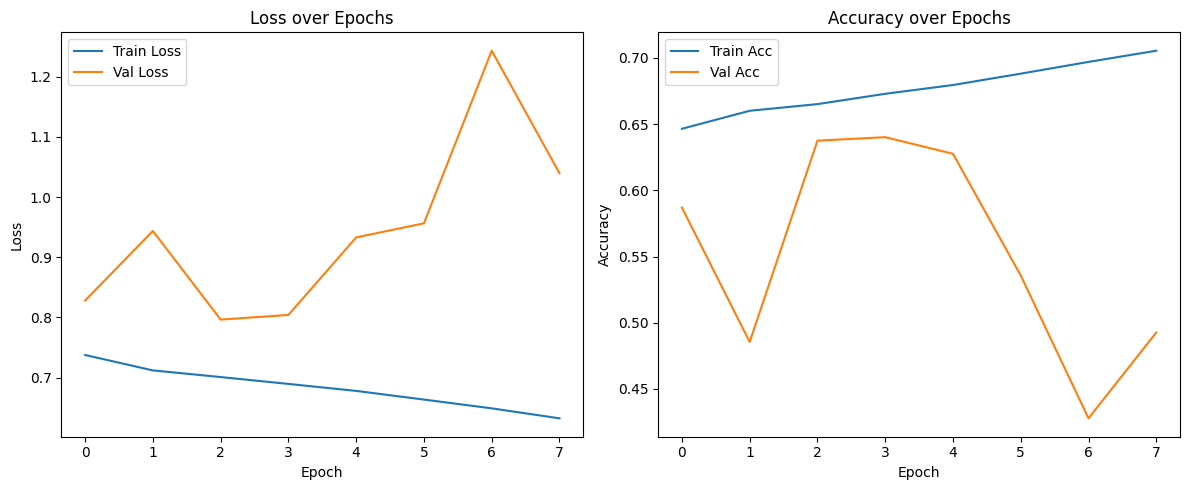

In [13]:
# ========= 3. 绘制 Loss 和 Accuracy 曲线 =========
plt.figure(figsize=(12, 5))

# 绘制 loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 绘制 accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Technical Modification

在上面的模型中，我们通过设置参数（κ 和 α），以及特征工程，初步取得了一个较好的结果。然而问题仍然存在，我们目前面临的问题是：模型结果并不稳定，时而高时而低，同时可能会出现过拟合问题。
我们有以下几个方式可以调整：
1. Batch normalization层和dropout层调整
2. 参数调整：epochs、learning rate
3. early stopping的设计

In [9]:
from tensorflow.keras import layers, models
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

def build_stable_deeplob(input_shape, num_classes=3, dropout_rate=0.2):
    inp = layers.Input(shape=input_shape)

    x = layers.Conv1D(64, 3, padding='same')(inp)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU(negative_slope=0.1)(x)
    x = layers.Dropout(dropout_rate)(x)

    x = layers.Conv1D(64, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU(negative_slope=0.1)(x)
    x = layers.Dropout(dropout_rate)(x)

    x = layers.LSTM(64, return_sequences=False)(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(dropout_rate)(x)

    out = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=inp, outputs=out)
    return model

In [20]:
model = build_stable_deeplob(input_shape)
model.compile(optimizer=Adam(1e-4, amsgrad=True), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, lr_scheduler]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/30
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 32s 10ms/step - accuracy: 0.6152 - loss: 0.8204 - val_accuracy: 0.6521 - val_loss: 0.7519 - learning_rate: 1.0000e-04
Epoch 2/30
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.6506 - loss: 0.7245 - val_accuracy: 0.6556 - val_loss: 0.7371 - learning_rate: 1.0000e-04
Epoch 3/30
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.6603 - loss: 0.7118 - val_accuracy: 0.6484 - val_loss: 0.7475 - learning_rate: 1.0000e-04
Epoch 4/30
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.6639 - loss: 0.7033 - val_accuracy: 0.6438 - val_loss: 0.7888 - learning_rate: 1.0000e-04
Epoch 5/30
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.6664 - loss: 0.6971 - val_accuracy: 0.6499 - val_loss: 0.7344 - learning_rate: 5.0000e-05
Epoch 6/30
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.6700 - loss: 0.6948 - val_accuracy: 0.6500 - val_loss: 0.7362 - learning_rate: 5.0000e-05
Epoch 7/30
2758/2758 ━━━━━━━━━━━━━━━━━━━

In [21]:
# ========= 1. 测试集预测与评估 =========
y_pred = model.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=1)

print("=== 测试集评估 ===")
print(classification_report(y_test, y_pred_label))

# ========= 2. 训练集预测与评估（用于判断过拟合） =========
y_pred_train = model.predict(X_train)
y_pred_train_label = np.argmax(y_pred_train, axis=1)

print("=== 训练集评估 ===")
print(classification_report(y_train, y_pred_train_label))

1379/1379 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
=== 测试集评估 ===
              precision    recall  f1-score   support

           0       0.66      0.28      0.39      9130
           1       0.66      0.90      0.76     26073
           2       0.66      0.35      0.46      8923

    accuracy                           0.66     44126
   macro avg       0.66      0.51      0.54     44126
weighted avg       0.66      0.66      0.62     44126

5516/5516 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step
=== 训练集评估 ===
              precision    recall  f1-score   support

           0       0.66      0.40      0.50     35227
           1       0.70      0.86      0.77    105255
           2       0.63      0.44      0.52     36021

    accuracy                           0.68    176503
   macro avg       0.66      0.57      0.59    176503
weighted avg       0.67      0.68      0.66    176503



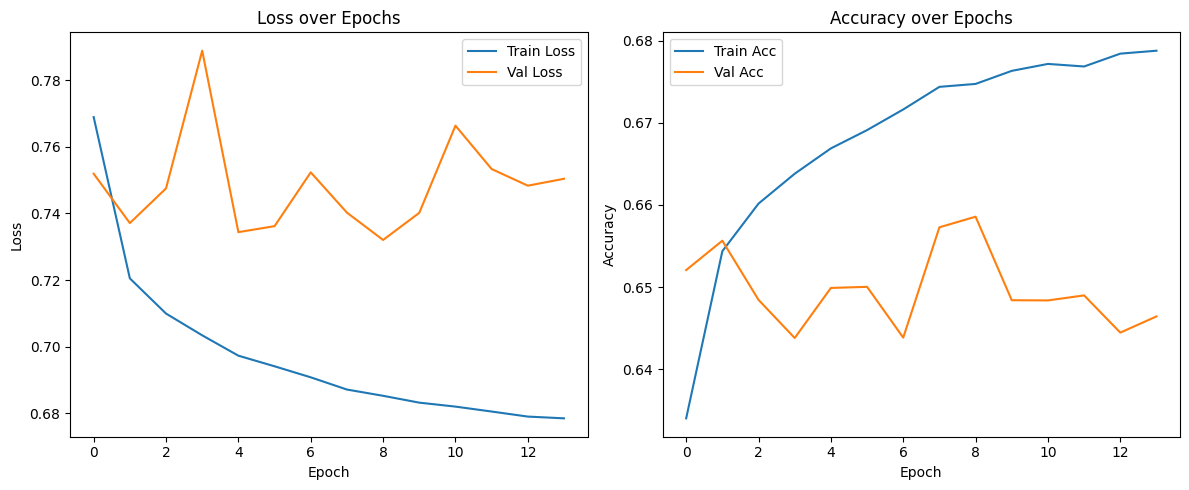

In [22]:
# ========= 3. 绘制 Loss 和 Accuracy 曲线 =========
plt.figure(figsize=(12, 5))

# 绘制 loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 绘制 accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

我们初步算是调和了过拟合的问题？如果再run一遍model，可以看看结果会不会变化。

In [25]:
model = build_stable_deeplob(input_shape)
model.compile(optimizer=Adam(1e-4, amsgrad=True), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, lr_scheduler]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/30
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 32s 10ms/step - accuracy: 0.6142 - loss: 0.8263 - val_accuracy: 0.6522 - val_loss: 0.7317 - learning_rate: 1.0000e-04
Epoch 2/30
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - accuracy: 0.6512 - loss: 0.7236 - val_accuracy: 0.6516 - val_loss: 0.7465 - learning_rate: 1.0000e-04
Epoch 3/30
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - accuracy: 0.6568 - loss: 0.7133 - val_accuracy: 0.6517 - val_loss: 0.7387 - learning_rate: 1.0000e-04
Epoch 4/30
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - accuracy: 0.6609 - loss: 0.7068 - val_accuracy: 0.6525 - val_loss: 0.7394 - learning_rate: 5.0000e-05
Epoch 5/30
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - accuracy: 0.6653 - loss: 0.7018 - val_accuracy: 0.6473 - val_loss: 0.7423 - learning_rate: 5.0000e-05
Epoch 6/30
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - accuracy: 0.6653 - loss: 0.6999 - val_accuracy: 0.6552 - val_loss: 0.7254 - learning_rate: 2.5000e-05
Epoch 7/30
2758/2758 ━━━━━━━━━━━━━━━━━━━

In [26]:
# ========= 1. 测试集预测与评估 =========
y_pred = model.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=1)

print("=== 测试集评估 ===")
print(classification_report(y_test, y_pred_label))

# ========= 2. 训练集预测与评估（用于判断过拟合） =========
y_pred_train = model.predict(X_train)
y_pred_train_label = np.argmax(y_pred_train, axis=1)

print("=== 训练集评估 ===")
print(classification_report(y_train, y_pred_train_label))

1379/1379 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
=== 测试集评估 ===
              precision    recall  f1-score   support

           0       0.61      0.35      0.44      9130
           1       0.66      0.89      0.75     26073
           2       0.70      0.29      0.41      8923

    accuracy                           0.66     44126
   macro avg       0.66      0.51      0.54     44126
weighted avg       0.66      0.66      0.62     44126

5516/5516 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step
=== 训练集评估 ===
              precision    recall  f1-score   support

           0       0.62      0.44      0.51     35227
           1       0.69      0.83      0.76    105255
           2       0.61      0.42      0.50     36021

    accuracy                           0.67    176503
   macro avg       0.64      0.56      0.59    176503
weighted avg       0.66      0.67      0.65    176503



姑且当我们解决了这个问题

| 改进项          | 内容                                             | 原因和意义                             |
| ------------ | ---------------------------------------------- | --------------------------------- |
| ✅ 激活函数       | `ReLU → LeakyReLU(negative_slope=0.1)`         | 防止神经元“死亡”，改善梯度流，训练更稳定             |
| ✅ Dropout 降低 | `0.3 → 0.2`，减少信息丢失                             | 降低模型信号损失，训练效果更充分                  |
| ✅ 优化器更稳健     | `AdamW → Adam(amsgrad=True)`                   | `amsgrad` 是更稳定的优化器变体，适合 loss 波动问题 |
| ✅ 动态学习率调节    | 添加 `ReduceLROnPlateau`                         | 自动降低学习率，有助于跳出局部最优，fine-tune 收敛结果  |
| ✅ 训练监控优化     | 加了 `restore_best_weights=True` 的 EarlyStopping | 确保保存效果最好的模型，而不是最后一轮模型             |

# Early Stopping

我们首先来解决early stopping的问题：

我们想测试early stopping的合理性：是model的问题，还是数据特征使然？

In [15]:
def build_another_deeplob(input_shape, num_classes=3, dropout_rate=0.2):
    inp = layers.Input(shape=input_shape)

    x = layers.Conv1D(64, 5, padding='same')(inp)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU(negative_slope=0.1)(x)
    x = layers.SpatialDropout1D(dropout_rate)(x)

    x = layers.Conv1D(128, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU(negative_slope=0.1)(x)
    x = layers.SpatialDropout1D(dropout_rate)(x)

    x = layers.MaxPooling1D(pool_size=2)(x)

    x = layers.LSTM(64, return_sequences=False)(x)
    x = layers.Dense(64)(x)
    x = layers.LeakyReLU(negative_slope=0.1)(x)
    x = layers.Dropout(dropout_rate)(x)

    out = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=inp, outputs=out)
    return model

In [16]:
model = build_another_deeplob(input_shape)
model.compile(optimizer=Adam(1e-4, amsgrad=True), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, lr_scheduler]
)

# ========= 1. 测试集预测与评估 =========
y_pred = model.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=1)

print("=== 测试集评估 ===")
print(classification_report(y_test, y_pred_label))

# ========= 2. 训练集预测与评估（用于判断过拟合） =========
y_pred_train = model.predict(X_train)
y_pred_train_label = np.argmax(y_pred_train, axis=1)

print("=== 训练集评估 ===")
print(classification_report(y_train, y_pred_train_label))

Epoch 1/30
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - accuracy: 0.6110 - loss: 0.8380 - val_accuracy: 0.6539 - val_loss: 0.7337 - learning_rate: 1.0000e-04
Epoch 2/30
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.6486 - loss: 0.7295 - val_accuracy: 0.6551 - val_loss: 0.7412 - learning_rate: 1.0000e-04
Epoch 3/30
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.6579 - loss: 0.7176 - val_accuracy: 0.6629 - val_loss: 0.7162 - learning_rate: 1.0000e-04
Epoch 4/30
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.6567 - loss: 0.7135 - val_accuracy: 0.6567 - val_loss: 0.7319 - learning_rate: 1.0000e-04
Epoch 5/30
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.6600 - loss: 0.7087 - val_accuracy: 0.6584 - val_loss: 0.7242 - learning_rate: 1.0000e-04
Epoch 6/30
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.6633 - loss: 0.7025 - val_accuracy: 0.6586 - val_loss: 0.7176 - learning_rate: 5.0000e-05
Epoch 7/30
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 26

再run一次看看稳不稳定

In [17]:
model = build_another_deeplob(input_shape)
model.compile(optimizer=Adam(1e-4, amsgrad=True), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, lr_scheduler]
)

# ========= 1. 测试集预测与评估 =========
y_pred = model.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=1)

print("=== 测试集评估 ===")
print(classification_report(y_test, y_pred_label))

# ========= 2. 训练集预测与评估（用于判断过拟合） =========
y_pred_train = model.predict(X_train)
y_pred_train_label = np.argmax(y_pred_train, axis=1)

print("=== 训练集评估 ===")
print(classification_report(y_train, y_pred_train_label))

Epoch 1/30
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - accuracy: 0.6078 - loss: 0.8362 - val_accuracy: 0.6510 - val_loss: 0.7569 - learning_rate: 1.0000e-04
Epoch 2/30
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.6505 - loss: 0.7289 - val_accuracy: 0.6631 - val_loss: 0.7576 - learning_rate: 1.0000e-04
Epoch 3/30
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.6549 - loss: 0.7204 - val_accuracy: 0.6544 - val_loss: 0.7435 - learning_rate: 1.0000e-04
Epoch 4/30
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.6565 - loss: 0.7130 - val_accuracy: 0.6648 - val_loss: 0.7150 - learning_rate: 1.0000e-04
Epoch 5/30
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.6597 - loss: 0.7083 - val_accuracy: 0.6626 - val_loss: 0.7334 - learning_rate: 1.0000e-04
Epoch 6/30
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.6650 - loss: 0.7032 - val_accuracy: 0.6516 - val_loss: 0.7286 - learning_rate: 1.0000e-04
Epoch 7/30
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 2

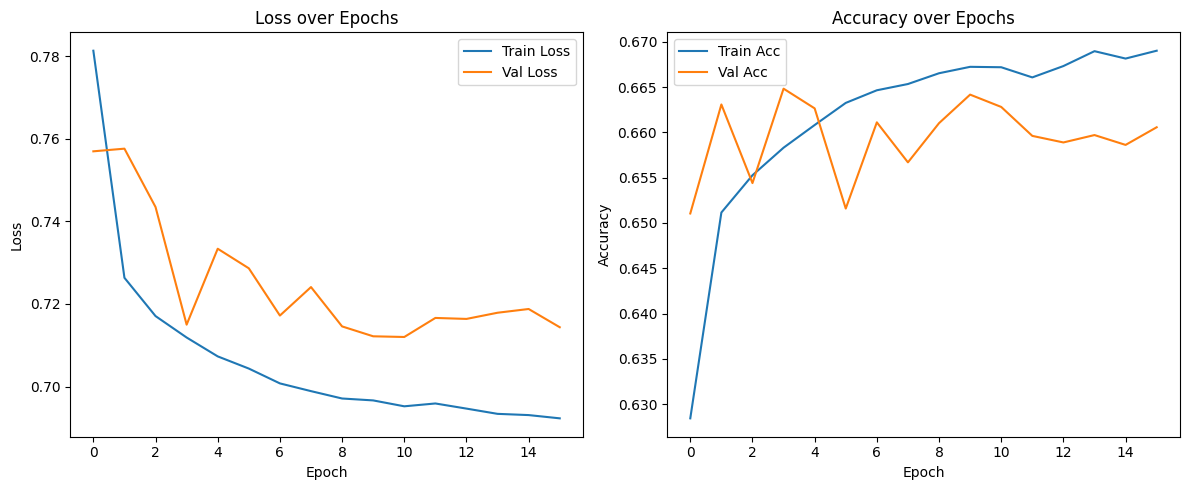

In [18]:
# ========= 3. 绘制 Loss 和 Accuracy 曲线 =========
plt.figure(figsize=(12, 5))

# 绘制 loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 绘制 accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

新的model可以解决early stopping太早逼停模型训练的问题。总结一下what we've done

| 修改项 | 内容                         | 原因                      |
| --- | -------------------------- | ----------------------- |
| 1   | 卷积核由 3 → 5，通道数由 64 → 128   | 捕捉更宽泛的时间特征，提高特征表达能力     |
| 2   | Dropout → SpatialDropout1D | 更适合时间序列的通道级正则，有助于稳定训练   |
| 3   | 添加 MaxPooling1D            | 降低 LSTM 压力，提取更具代表性的局部特征 |
| 4   | ReLU → LeakyReLU           | 避免神经元失活问题，提高非线性拟合能力     |

# Data Imbalance

Now we've accomplished some parts:
1. Parameter choosing: we chose **Κ = 20, α = 1bp**
2. Data pre-engineering: turn absolute price to **relative price**, and transform the absolute volume into **logged volume**
3. Model architecture: add batchnormalization and dropout layer, and change some technical details to make the result in general **more stable**

But there are still some problems awaiting for being solved:
1. **Data Imbalance**, we haven't solve this problem ( the result is still dominated by label 1 )

## Method 1: using focal loss instead of cross entropy. （控制难样本，提升 precision）

In [19]:
def focal_loss_sparse(gamma=2., alpha=[2.0, 1.0, 2.0]):
    alpha = tf.constant(alpha, dtype=tf.float32)

    def loss(y_true, y_pred):
        y_true = tf.cast(y_true, tf.int32)
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1.0 - 1e-7)

        y_true_onehot = tf.one_hot(y_true, depth=3)
        cross_entropy = -y_true_onehot * tf.math.log(y_pred)
        weight = tf.math.pow(1 - y_pred, gamma) * alpha
        return tf.reduce_mean(tf.reduce_sum(weight * cross_entropy, axis=-1))

    return loss

In [20]:
model = build_another_deeplob(input_shape)
model.compile(optimizer=Adam(1e-4, amsgrad=True), loss=focal_loss_sparse(gamma=2.0, alpha=[2.0, 1.0, 2.0]), metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, lr_scheduler]
)

Epoch 1/30
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - accuracy: 0.5474 - loss: 0.5249 - val_accuracy: 0.6349 - val_loss: 0.4371 - learning_rate: 1.0000e-04
Epoch 2/30
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.5911 - loss: 0.4140 - val_accuracy: 0.6164 - val_loss: 0.4247 - learning_rate: 1.0000e-04
Epoch 3/30
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.5941 - loss: 0.4018 - val_accuracy: 0.6203 - val_loss: 0.4031 - learning_rate: 1.0000e-04
Epoch 4/30
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.5964 - loss: 0.3991 - val_accuracy: 0.6448 - val_loss: 0.4164 - learning_rate: 1.0000e-04
Epoch 5/30
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.6028 - loss: 0.3952 - val_accuracy: 0.6414 - val_loss: 0.4064 - learning_rate: 1.0000e-04
Epoch 6/30
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.6052 - loss: 0.3908 - val_accuracy: 0.6428 - val_loss: 0.4039 - learning_rate: 5.0000e-05
Epoch 7/30
2758/2758 ━━━━━━━━━━━━━━━━━━━

In [21]:
# ========= 1. 测试集预测与评估 =========
y_pred = model.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=1)

print("=== 测试集评估 ===")
print(classification_report(y_test, y_pred_label))

# ========= 2. 训练集预测与评估（用于判断过拟合） =========
y_pred_train = model.predict(X_train)
y_pred_train_label = np.argmax(y_pred_train, axis=1)

print("=== 训练集评估 ===")
print(classification_report(y_train, y_pred_train_label))

1379/1379 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
=== 测试集评估 ===
              precision    recall  f1-score   support

           0       0.53      0.57      0.55      9130
           1       0.72      0.69      0.70     26073
           2       0.57      0.59      0.58      8923

    accuracy                           0.65     44126
   macro avg       0.61      0.62      0.61     44126
weighted avg       0.65      0.65      0.65     44126

5516/5516 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step
=== 训练集评估 ===
              precision    recall  f1-score   support

           0       0.49      0.67      0.57     35227
           1       0.76      0.58      0.66    105255
           2       0.52      0.68      0.59     36021

    accuracy                           0.62    176503
   macro avg       0.59      0.65      0.61    176503
weighted avg       0.66      0.62      0.63    176503



以降低precision的代价提高了recall

## Method 2: Oversampling

In [22]:
from collections import Counter
from sklearn.utils import resample

def balance_classes(X, y):
    X_new, y_new = [], []
    class_counts = Counter(y)

    max_class = max(class_counts, key=class_counts.get)
    max_count = class_counts[max_class]

    for c in np.unique(y):
        X_c = X[y == c]
        y_c = y[y == c]

        # 只对类0和类2进行 oversample
        if c in [0, 2]:
            X_c_resampled, y_c_resampled = resample(X_c, y_c,
                                                    replace=True,
                                                    n_samples=max_count,
                                                    random_state=42)
        else:
            X_c_resampled, y_c_resampled = X_c, y_c

        X_new.append(X_c_resampled)
        y_new.append(y_c_resampled)

    return np.concatenate(X_new), np.concatenate(y_new)

# 使用方法
X_balanced, y_balanced = balance_classes(X_train, y_train)

In [23]:
model = build_another_deeplob(input_shape)
model.compile(optimizer=Adam(1e-4, amsgrad=True), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

history = model.fit(
    X_balanced, y_balanced,
    epochs=30,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, lr_scheduler]
)

Epoch 1/30
4934/4934 ━━━━━━━━━━━━━━━━━━━━ 48s 9ms/step - accuracy: 0.5818 - loss: 0.8647 - val_accuracy: 0.5437 - val_loss: 0.8235 - learning_rate: 1.0000e-04
Epoch 2/30
4934/4934 ━━━━━━━━━━━━━━━━━━━━ 45s 9ms/step - accuracy: 0.6498 - loss: 0.7517 - val_accuracy: 0.5227 - val_loss: 0.8396 - learning_rate: 1.0000e-04
Epoch 3/30
4934/4934 ━━━━━━━━━━━━━━━━━━━━ 45s 9ms/step - accuracy: 0.6570 - loss: 0.7392 - val_accuracy: 0.5630 - val_loss: 0.7990 - learning_rate: 1.0000e-04
Epoch 4/30
4934/4934 ━━━━━━━━━━━━━━━━━━━━ 45s 9ms/step - accuracy: 0.6601 - loss: 0.7315 - val_accuracy: 0.5564 - val_loss: 0.8143 - learning_rate: 1.0000e-04
Epoch 5/30
4934/4934 ━━━━━━━━━━━━━━━━━━━━ 45s 9ms/step - accuracy: 0.6626 - loss: 0.7275 - val_accuracy: 0.5858 - val_loss: 0.7806 - learning_rate: 1.0000e-04
Epoch 6/30
4934/4934 ━━━━━━━━━━━━━━━━━━━━ 45s 9ms/step - accuracy: 0.6647 - loss: 0.7208 - val_accuracy: 0.5829 - val_loss: 0.7822 - learning_rate: 1.0000e-04
Epoch 7/30
4934/4934 ━━━━━━━━━━━━━━━━━━━━ 45s 

In [24]:
# ========= 1. 测试集预测与评估 =========
y_pred = model.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=1)

print("=== 测试集评估 ===")
print(classification_report(y_test, y_pred_label))

# ========= 2. 训练集预测与评估（用于判断过拟合） =========
y_pred_train = model.predict(X_train)
y_pred_train_label = np.argmax(y_pred_train, axis=1)

print("=== 训练集评估 ===")
print(classification_report(y_train, y_pred_train_label))

1379/1379 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
=== 测试集评估 ===
              precision    recall  f1-score   support

           0       0.50      0.64      0.56      9130
           1       0.75      0.55      0.64     26073
           2       0.50      0.74      0.59      8923

    accuracy                           0.61     44126
   macro avg       0.58      0.65      0.60     44126
weighted avg       0.65      0.61      0.61     44126

5516/5516 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step
=== 训练集评估 ===
              precision    recall  f1-score   support

           0       0.51      0.73      0.60     35227
           1       0.82      0.51      0.63    105255
           2       0.49      0.83      0.62     36021

    accuracy                           0.62    176503
   macro avg       0.61      0.69      0.61    176503
weighted avg       0.69      0.62      0.62    176503



## Method 3: Class Weight

In [25]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: w for i, w in enumerate(class_weights)}

model = build_another_deeplob(input_shape)
model.compile(optimizer=Adam(1e-4, amsgrad=True), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, lr_scheduler],
    class_weight=class_weight_dict
)

# ========= 1. 测试集预测与评估 =========
y_pred = model.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=1)

print("=== 测试集评估 ===")
print(classification_report(y_test, y_pred_label))

# ========= 2. 训练集预测与评估（用于判断过拟合） =========
y_pred_train = model.predict(X_train)
y_pred_train_label = np.argmax(y_pred_train, axis=1)

print("=== 训练集评估 ===")
print(classification_report(y_train, y_pred_train_label))

Epoch 1/30
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - accuracy: 0.4905 - loss: 0.9049 - val_accuracy: 0.5740 - val_loss: 0.8126 - learning_rate: 1.0000e-04
Epoch 2/30
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.5377 - loss: 0.7666 - val_accuracy: 0.5446 - val_loss: 0.8338 - learning_rate: 1.0000e-04
Epoch 3/30
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.5435 - loss: 0.7514 - val_accuracy: 0.5745 - val_loss: 0.7921 - learning_rate: 1.0000e-04
Epoch 4/30
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.5481 - loss: 0.7459 - val_accuracy: 0.5583 - val_loss: 0.8231 - learning_rate: 1.0000e-04
Epoch 5/30
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.5488 - loss: 0.7457 - val_accuracy: 0.5716 - val_loss: 0.7978 - learning_rate: 1.0000e-04
Epoch 6/30
2758/2758 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.5524 - loss: 0.7384 - val_accuracy: 0.5962 - val_loss: 0.7678 - learning_rate: 5.0000e-05
Epoch 7/30
2758/2758 ━━━━━━━━━━━━━━━━━━━

which however, only improves the recall score at the price of precision rate.